# Conditional Querying of Virtual Bout Data

First, we load dependencies for the app we are building

In [1]:
from ipywidgets import interactive
from ipywidgets import interact
from ipywidgets import IntSlider
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

Next, load helper functions, data and model

In [8]:
run app_helpers.py

In [9]:
df, population_model = single_model_loader(0)

In [10]:
df.head()

,tailseg0t0,tailseg0t2,tailseg0t4,tailseg0t6,tailseg0t8,tailseg0t10,tailseg0t12,tailseg0t14,tailseg0t16,tailseg0t18,...,tailseg12t56,tailseg12t58,tailseg12t60,tailseg12t62,tailseg12t64,tailseg12t66,tailseg12t68,BoutAz,BoutYaw,BoutDistance
0,-0.037785,-1.051741,-1.555487,-1.578739,-0.885039,-0.359973,0.422891,0.306353,-0.880640,-1.213983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.943938,-0.546319,15.198098
1,0.037875,0.294820,-0.532817,-0.959615,-0.517806,0.745207,-0.982325,-1.063232,-0.630761,0.893257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.166322,-0.122785,17.712327
2,-0.159675,-0.131188,0.772267,0.679667,-0.164311,-0.755139,-0.249632,0.863167,1.120286,-0.192197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047504,0.031322,12.713099
3,-0.008923,0.168504,-0.041639,-0.636312,-0.464787,0.516559,0.886317,-0.811480,-0.813778,0.452136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100533,-0.054734,14.342273
4,0.139174,-0.548114,-1.422731,-1.740559,-0.648211,0.774985,0.593027,-0.160717,-1.372320,-1.058521,...,-0.02641,NaN,NaN,NaN,NaN,NaN,NaN,-0.596500,-0.416515,16.045420


In [11]:
%timeit population_model.sample(1)

18 ms ± 54 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit population_model.condition((I('tailseg0t0') < .5) & (I('BoutAz') < .5) & (I('tailseg3t0') < .1))

265 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
generate(population_model, 5)

,tailseg0t0,tailseg0t2,tailseg0t4,tailseg0t6,tailseg0t8,tailseg0t10,tailseg0t12,tailseg0t14,tailseg0t16,tailseg0t18,...,tailseg12t56,tailseg12t58,tailseg12t60,tailseg12t62,tailseg12t64,tailseg12t66,tailseg12t68,BoutAz,BoutYaw,BoutDistance
0,0.478842,-0.922914,0.115381,2.191038,0.415985,0.011465,0.070136,-0.205415,0.886451,0.421936,...,0.008687,0.020236,0.056417,-0.037160,-0.062249,0.025671,0.028786,-1.282339,-0.559562,-1.849260
1,0.338205,0.659850,-0.119549,-0.090466,0.655718,0.803282,-0.471406,-1.006553,0.095652,1.067863,...,-0.019616,-0.046512,0.028598,0.071839,0.097216,0.047403,-0.015565,-0.247278,-0.076210,8.968394
2,-0.638925,-0.554656,0.318682,1.583775,0.737058,-1.022889,-0.484895,1.099779,1.398236,-0.060100,...,0.066503,0.020766,-0.031969,-0.010208,-0.099658,0.042780,-0.002419,-0.316628,-0.057954,19.818611
3,0.166791,0.785374,-0.412954,1.135028,-2.073878,-1.183827,-0.908563,0.386735,-1.699603,1.144502,...,0.018402,0.022768,0.046639,-0.050604,-0.041807,0.039706,-0.032639,-0.378987,0.027804,74.383991
4,-0.814127,-0.747669,1.125263,1.071044,-0.181775,-0.333613,-0.886271,1.292032,0.539333,-0.672264,...,-0.054108,-0.083804,-0.056850,-0.001112,-0.029443,-0.085344,-0.026454,0.019415,-0.075981,18.648376


In [15]:
%timeit population_model.constrain({I('tailseg0t0') : .5, I('BoutAz') : .5, I('tailseg3t0') : .1, I('tailseg6t0') : .2})

129 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Synthetic and original distributions align

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df.tailseg0t0, ax=ax, label='observed')
sns.kdeplot(generate(population_model, 500).tailseg0t0, ax=ax, label='generated')
ax.legend();

In [8]:
from collections import OrderedDict

def az_cond(conditional_val):
    fig, ax = plt.subplots()
    conditioned_population_model = population_model.condition(I('tailseg0t0') > conditional_val)
    p_bout_az = conditioned_population_model.prob(I('BoutAz') > .5)
    pd.Series(OrderedDict([('True', p_bout_az), ('False', 1-p_bout_az)])).plot(kind='barh', ax=ax)
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability Bout Az Greater than .5')
    
interactive_plot = interactive(az_cond, conditional_val=(0, 2.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.25, description='conditional_val', max=2.5), Output(layout=Layout(he…

In [13]:
%timeit population_model.condition(I('tailseg0t0') > .5)

6.71 s ± 79.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


KeyError: Identity('column-a')

# Plotting Dependencies Between Model Variables

In [11]:
with open('/Users/nightcrawler/inferenceql.auto-modeling/data/dep-prob.json', 'r') as f:
    dep_prob = json.load(f)

In [12]:
def clustermap(df, ax=None, **kwargs):
    """Plot a clustermap by pivoting the last 3 columns of `df`.

    The `df` is typically returned from an ESTIMATE PAIRWISE query in BQL.
    """
    if len(df.columns) < 3:
        raise ValueError('At least three columns requried: %s' % (df.columns,))
    # Pivot the matrix.
    pivot = df.pivot(
        index=df.columns[-3],
        columns=df.columns[-2],
        values=df.columns[-1],
    )
    pivot.fillna(0, inplace=True)
    # Check if all values are between 0 and 1 to set vmin and vmax.
    (vmin, vmax) = (None, None)
    if all(0 <= v <= 1 for v in df.iloc[:,-1]):
        (vmin, vmax) = (0, 1)
    zmatrix =  _clustermap(
        pivot.as_matrix(),
        xticklabels=pivot.columns.tolist(),
        yticklabels=pivot.index.tolist(),
        vmin=vmin,
        vmax=vmax
    )
    # Heuristics for the size.
    figsize = kwargs.pop('figsize', None)
    if figsize is None:
        half_root_col = (df.shape[0] ** .5) / 2.
        figsize = (half_root_col, .8 * half_root_col)
    zmatrix.fig.set_size_inches(figsize)
    return zmatrix


def heatmap(df, ax=None, **kwargs):
    """Plot a heatmap by pivoting the last 3 columns of `df`.

    The `df` is a "tidy-dataframe" i.e. from an ESTIMATE PAIRWISE query in BQL.
    """
    if len(df.columns) < 3:
        raise ValueError('At least three columns requried: %s' % (df.columns,))
    # Pivot the matrix.
    pivot = df.pivot(
        index=df.columns[-3],
        columns=df.columns[-2],
        values=df.columns[-1],
    )
    pivot.fillna(0, inplace=True)
    # Check if all values are between 0 and 1 to set vmin and vmax.
    (vmin, vmax) = (None, None)
    if all(0 <= v <= 1 for v in df.iloc[:,-1]):
        (vmin, vmax) = (0, 1)
    # Apply the optimal ordering from a clustermap.
    D = np.asmatrix(pivot.values)
    (xordering, yordering) = _clustermap_ordering(D)
    xticklabels = np.asarray(pivot.columns)[xordering]
    yticklabels = np.asarray(pivot.index)[yordering]
    D = D[:,xordering]
    D = D[yordering,:]
    ax = sns.heatmap(
        D,
        xticklabels=xticklabels,
        yticklabels=yticklabels,
        linewidths=0.2,
        cbar=kwargs.get('cbar', True),
        cmap='BuGn',
        ax=ax,
        vmin=vmin,
        vmax=vmax,
    )
    # Heuristics for the size.
    figsize = kwargs.pop('figsize', None)
    if figsize is None:
        half_root_col = (df.shape[0] ** .5) / 2.5
        figsize = (half_root_col, .8 * half_root_col)
    ax.get_figure().set_size_inches(figsize)
    return ax


def _clustermap(
        D, xticklabels=None, yticklabels=None, vmin=None, vmax=None, **kwargs):
    sns.set_style('white')
    if xticklabels is None:
        xticklabels = range(D.shape[0])
    if yticklabels is None:
        yticklabels = range(D.shape[1])
    zmatrix = sns.clustermap(
        D,
        xticklabels=xticklabels,
        yticklabels=yticklabels,
        linewidths=0.2,
        cmap='BuGn',
        vmin=vmin,
        vmax=vmax,
    )
    plt.setp(zmatrix.ax_heatmap.get_yticklabels(), rotation=0)
    plt.setp(zmatrix.ax_heatmap.get_xticklabels(), rotation=90)
    return zmatrix


def _clustermap_ordering(D):
    """Returns the ordering of variables in D according to the clustermap."""
    zmatrix = _clustermap(D)
    plt.close(zmatrix.fig)
    xordering = zmatrix.dendrogram_col.reordered_ind
    yordering = zmatrix.dendrogram_row.reordered_ind
    return (xordering, yordering)


def tidy_pairwise(array, index, columns, xlabel=None, ylabel=None, vlabel=None):
    """Convert a pairwise matrix into a tidy data frame."""
    assert array.shape == (len(index), len(columns))
    xlabel = xlabel or 'var0'
    ylabel = ylabel or 'var1'
    vlabel = vlabel or 'value'
    data = [
        (ind, col, array[i,j])
        for i, ind in enumerate(index)
        for j, col in enumerate(columns)
    ]
    return pd.DataFrame(data, columns=[xlabel, ylabel, vlabel])


In [35]:
c1s = []
c2s = []
ps = []
for c1 in dep_prob.keys():
    for c2 in dep_prob.keys():
        if c1 == c2:
            p = 1.
        else:
            p = dep_prob[c1][c2]
        c1s.append(c1)
        c2s.append(c2)
        ps.append(p)
dep_df = pd.DataFrame({"c1":c1, "c2":c2, "p":ps})

              tailseg0t0  tailseg0t2  tailseg0t4  tailseg0t6  tailseg0t8  \
tailseg0t0          1.00        0.90        0.66        0.64        0.62   
tailseg0t2          0.90        1.00        0.74        0.72        0.70   
tailseg0t4          0.66        0.74        1.00        0.96        0.88   
tailseg0t6          0.64        0.72        0.96        1.00        0.92   
tailseg0t8          0.62        0.70        0.88        0.92        1.00   
...                  ...         ...         ...         ...         ...   
tailseg12t66        0.42        0.42        0.38        0.38        0.42   
tailseg12t68        0.20        0.20        0.16        0.14        0.16   
BoutAz              0.68        0.76        0.92        0.92        0.92   
BoutYaw             0.68        0.76        0.92        0.92        0.92   
BoutDistance        0.50        0.54        0.70        0.72        0.74   

              tailseg0t10  tailseg0t12  tailseg0t14  tailseg0t16  tailseg0t18  \
tailse

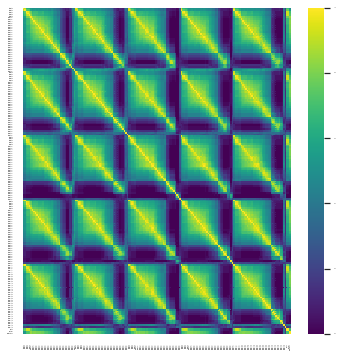

In [44]:
c1s = []
c2s = []
ps = []
for c1 in dep_prob.keys():
    for c2 in dep_prob.keys():
        if c1 == c2:
            p = 1.
        else:
            p = dep_prob[c1][c2]
        ps.append(p)
    c1s.append(c1)
        

#df = pd.DataFrame(ps)   #, index=c1s, columns=c2s)

ps_arr = np.array(ps)
ps_reshape = ps_arr.reshape((int(np.sqrt(len(ps))), int(np.sqrt(len(ps)))))
dep_df = pd.DataFrame(ps_reshape, index=c1s, columns=c1s)   #, index=c1s, columns=c2s)

print(dep_df)
f = plt.figure(figsize=(6,6))
sns.set(font_scale = .1)
sns.heatmap(dep_df, xticklabels=1, yticklabels=1, cmap="viridis")
plt.savefig("deps.pdf")


In [46]:
clustermap(dep_prob)

AttributeError: 'dict' object has no attribute 'columns'

In [ ]:
population_model.mutual_information(I("column-a") > 42., I("column-b") << {"category a", "category b"}) 